In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
olympics_df = pd.read_csv('olympics-data/summer.csv')

In [4]:
olympics_df.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [5]:
olympics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


### WHO WON THE MOST MEDALS IN THE 1920 OLYMPICS?

In [6]:
data_1920 = olympics_df[olympics_df['Year']==1920]

In [7]:
# get the number of times each athlete has been mentioned in column, whoever is the highest won the most medals
data_1920['Athlete'].mode()

0               LEE, Willis
1    SPOONER, Lloyd Spencer
dtype: object

### WHO WON THE MOST GOLD MEDALS IN 1920 OLYMPICS?

In [8]:
data_1920[(data_1920['Medal'] == 'Gold')]['Athlete'].value_counts()

NADI, Nedo                5
LEE, Willis               5
VAN INNIS, Hubert         4
OSBURN, Carl Townsend     4
SPOONER, Lloyd Spencer    4
                         ..
ANDERSEN, Rudolf Svend    1
PACKBIERS, Jan Joseph     1
GUSTAFSSON, Helge         1
SVENSEN, Erik             1
SANTELLI, Italo           1
Name: Athlete, Length: 420, dtype: int64

### GOLD MEDAL SPLIT FOR MEN AND WOMEN, IN THE 1920 OLYMPICS

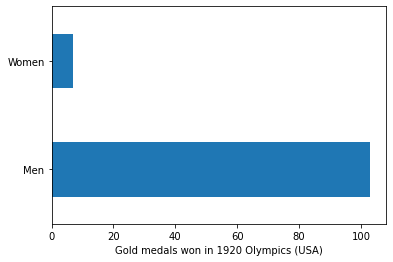

In [9]:
data_1920[(data_1920['Country'] == 'USA') & (data_1920['Medal']=='Gold')]['Gender'].value_counts().plot(kind='barh')
plt.xlabel('Gold medals won in 1920 Olympics (USA)');

### WHICH COUNTRY WON THE MOST MEDALS FOR ROWING IN 2008 OLYMPICS

In [10]:
data_2008 = olympics_df[olympics_df['Year']==2008]

<AxesSubplot:>

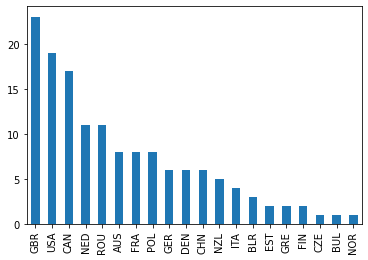

In [11]:
data_2008[data_2008['Discipline'] == 'Rowing']['Country'].value_counts().plot(kind='bar')

### CLUSTER GOLD MEDALS BY USA,CHINA,UK IN 1996 OLYMPICS

In [12]:
from sklearn.cluster import KMeans
from sklearn import metrics


In [13]:
data_1996 = olympics_df[olympics_df['Year']==1996]

In [14]:
countries = ['USA','AUS','GBR']
taskdf = data_1996[(data_1996['Country'].isin(countries))&(data_1996['Medal']=='Gold')]

In [15]:
taskdf

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
21315,1996,Atlanta,Aquatics,Swimming,"ROUSE, Jeff Norman",USA,Men,100M Backstroke,Gold
21318,1996,Atlanta,Aquatics,Swimming,"BOTSFORD, Beth",USA,Women,100M Backstroke,Gold
21330,1996,Atlanta,Aquatics,Swimming,"VAN DYKEN, Amy",USA,Women,100M Butterfly,Gold
21339,1996,Atlanta,Aquatics,Swimming,"PERKINS, Kieren John",AUS,Men,1500M Freestyle,Gold
21342,1996,Atlanta,Aquatics,Swimming,"BRIDGEWATER, Brad",USA,Men,200M Backstroke,Gold
...,...,...,...,...,...,...,...,...,...
22989,1996,Atlanta,Volleyball,Beach volley.,"KIRALY, Charles",USA,Men,Beach Volleyball,Gold
22990,1996,Atlanta,Volleyball,Beach volley.,"STEFFES, Kent",USA,Men,Beach Volleyball,Gold
23111,1996,Atlanta,Wrestling,Wrestling Free.,"CROSS, Kendall Duane",USA,Men,52 - 57KG (Bantamweight),Gold
23114,1996,Atlanta,Wrestling,Wrestling Free.,"BRANDS, Tom",USA,Men,57 - 62KG (Featherweight),Gold


### HOW MANY MEDALS HAS USA WON OVER THE YEARS, FOR EACH KIND?

In [18]:
country_grp = olympics_df.groupby('Country')

In [22]:
country_grp.get_group('USA')

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
11,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
15,1896,Athens,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110M Hurdles,Gold
19,1896,Athens,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500M,Silver
21,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,400M,Gold
...,...,...,...,...,...,...,...,...,...
31035,2012,London,Volleyball,Volleyball,"TOM, Logan",USA,Women,Volleyball,Silver
31099,2012,London,Wrestling,Wrestling Freestyle,"CHUN, Clarissa Kyoko Mei Ling",USA,Women,Wf 48 KG,Bronze
31112,2012,London,Wrestling,Wrestling Freestyle,"SCOTT, Coleman",USA,Men,Wf 60 KG,Bronze
31125,2012,London,Wrestling,Wrestling Freestyle,"BURROUGHS, Jordan Ernest",USA,Men,Wf 74 KG,Gold


<AxesSubplot:ylabel='Medal'>

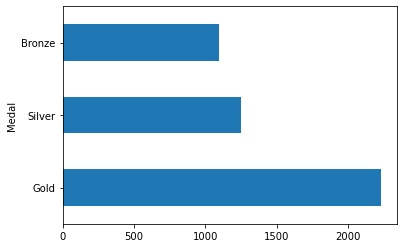

In [48]:
country_grp['Medal'].value_counts()['USA'].plot(x='Medals',kind='barh')

### YEARS WHEN ANY ATHLETE WON MORE THAN 3 MEDALS, AND WHICH DISCIPLINE?

In [49]:
task7_grp = olympics_df.groupby(['Year','Athlete'])

In [50]:
task7_grp

In [65]:
task7_grp['Medal'].value_counts()

Year  Athlete                   Medal 
1896  ANDREOU, Joannis          Silver    1
      ANDRIAKOPOULOS, Nicolaos  Gold      1
                                Silver    1
      ATHANASOPOULOS, Spyros    Silver    1
      BATTEL, Edward            Bronze    1
                                         ..
2012  ZOU, Kai                  Gold      2
                                Bronze    1
      ZOU, Shiming              Gold      1
      ZUEVA, Anastasia          Silver    1
      ZURRER, Emily Jane        Bronze    1
Name: Medal, Length: 29529, dtype: int64

In [166]:
year_grp['Athlete'].value_counts()

Year  Athlete             
1896  WEINGÄRTNER, Hermann    6
      FLATOW, Alfred          4
      GARRETT, Robert         4
      HOFMANN, Fritz          4
      SCHUMANN, Carl          4
                             ..
2012  ZOLNIR, Urska           1
      ZONDERLAND, Epke        1
      ZOU, Shiming            1
      ZUEVA, Anastasia        1
      ZURRER, Emily Jane      1
Name: Athlete, Length: 27757, dtype: int64

In [168]:
#for year,athlete in year_grp['Athlete'].value_counts().iteritems():
        #print(year,'-',athlete)
peeps = np.array([])
year_grp.apply(lambda i:i.mode())
    

TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
print(peeps)

In [98]:
olympics_df[olympics_df['Athlete'].mode() > 3]

TypeError: '>' not supported between instances of 'str' and 'int'

In [111]:
athlete_grp = olympics_df.groupby(['Athlete'])

TypeError: 